In [5]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class SVM:
    def __init__(self):
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]

        def objective(x):
            return np.dot(x[:-1], x[:-1])

        def constraint(x):
            return y * (np.dot(X, x[:-1]) + x[-1]) - 1

        w = np.zeros(d+1)
        cons = {'type': 'ineq', 'fun': constraint}
        res = minimize(objective, w, constraints=cons)

        self.w = res.x[:-1]
        self.b = res.x[-1]
        
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

svm = SVM()
svm.fit(X,y)

In [2]:
def generate_data(n, d, sep):
    w = np.random.randn(d)
    X = np.random.randn(n, d)
    b = np.random.randn()
    y = np.sign(np.dot(X, w) + b)
    idx = np.random.choice(n, int(sep*n), replace=False)
    y[idx] *= -1
    return X, y

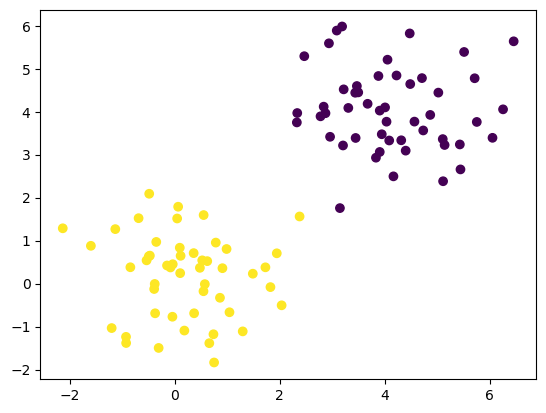

In [6]:
import numpy as np

X1 = np.random.randn(50, 2) + np.array([0, 0])
X2 = np.random.randn(50, 2) + np.array([4, 4])

X = np.vstack((X1, X2))

y = np.hstack((np.ones(50), -np.ones(50)))

plt.scatter(X[:, 0], X[:, 1], c=y)

In [35]:
import matplotlib.pyplot as plt

In [36]:
svm = SVM()

In [37]:
svm.fit(X,y)

In [38]:
(svm.predict(X) == y).sum() / len(y)

1.0